In [1]:
import sys
sys.path.append('/home/bendog/Documents/sync/project/CaImAn')
%run /home/bendog/Documents/sync/project/CaImAn/miniscope/miniscope.py

tifffile not found, using skimage.externals
tifffile package not found, using skimage.external.tifffile
numba not found
KERAS NOT INSTALLED. IF YOU WANT TO USE THE CNN BASED COMPONENT CLASSIFIER (experimental) CONTACT THE DEVELOPERS


So last time we're left with a meta map containing mappings from all combination of 5 sessions, which looks like this:

In [2]:
import pickle
with open('/home/bendog/Documents/MS101/meta_all.pkl', 'rb') as f:
    meta_all = pickle.load(f, encoding='latin1')
meta_all

,distance,s1,s2,s4,s5,s6,nsession,missing,conflict,conflict_with,match_score,missing_score,conflict_score,score,active
2543,40.460345,89.0,242.0,107.0,161.0,111.0,5,"[(s6, s4), (s1, s6, s5, s4)]","[2070, 1145]","[2070, 1145]",67.0,6.0,2.0,65.0,True
2512,28.449508,88.0,116.0,123.0,190.0,113.0,5,[],"[1792, 1258, 534, 522, 66]","[1792, 1258, 534, 522, 66]",72.0,0.0,5.0,67.0,True
2510,36.794160,84.0,114.0,143.0,103.0,106.0,5,"[(s6, s4), (s2, s6, s4)]","[2224, 2366, 1601, 1696, 509, 286, 902, 1144]","[2224, 2366, 1601, 1696, 509, 286, 902, 1144]",62.0,5.0,8.0,54.0,True
2509,44.828667,121.0,111.0,171.0,160.0,213.0,5,"[(s1, s5), (s2, s5, s4), (s2, s6), (s2, s1, s5...","[2467, 2323, 1516, 1372, 2004, 1695, 690]","[2467, 2323, 1516, 1372, 2004, 1695, 690]",52.0,11.0,12.0,40.0,True
2508,24.492216,79.0,110.0,98.0,100.0,103.0,5,[],[],[],75.0,0.0,0.0,75.0,True
2507,70.663339,77.0,107.0,94.0,94.0,99.0,5,"[(s2, s5), (s2, s1, s5), (s6, s5, s4), (s1, s6...","[2221, 2319, 1685, 1457, 1428, 2000, 1886, 188...","[2221, 2319, 1685, 1457, 1428, 2000, 1886, 188...",34.0,25.0,24.0,10.0,True
2506,60.440590,120.0,105.0,93.0,93.0,98.0,5,"[(s2, s1, s4), (s1, s6, s5), (s2, s1, s5, s4),...","[2306, 1620, 1349, 1444, 1969, 421, 308, 82, 1...","[2306, 1620, 1349, 1444, 1969, 421, 308, 82, 1...",47.0,13.0,15.0,32.0,True
2505,46.739138,76.0,100.0,88.0,88.0,92.0,5,"[(s2, s6, s5), (s2, s5, s4)]","[1334, 636]","[1334, 636]",67.0,6.0,2.0,65.0,True
2504,39.211430,73.0,99.0,85.0,85.0,164.0,5,"[(s6, s5, s4), (s6, s5)]",[1056],[1056],69.0,5.0,1.0,68.0,True
2503,23.071610,149.0,94.0,186.0,174.0,171.0,5,[],[],[],75.0,0.0,0.0,75.0,True


As a reminder, each row represent a nd-mapping, which may 'link' 2 to 5 units from different sessions together. (i.e, suggest them to be the same cell). The left-most column is **meta index**, a unique id assigned to each mapping. **distance** is the nd-distance of the mapping. **s1** to **s6** is the corresponding unit id in each session. **nsession** is the number of sessions involved in the mapping and should equal to the number of non-Nan values from **s1** to **s6**. **missing** is a list contatining missing mappings assuming current mapping to be true, represented by corresponding session names enclosed by colon. **conflict** is a list contating the **meta index** of mappings that directly conflict with the current mapping, while **conflict_with** contains all the mappings that might refer to the current one as conflicting mapping. The difference between **conflict** and **conflict_with** is that **conflict** only consider only mappings that has equal or smaller **nsession** (shorter) than the current mapping, while **conflict_with** includes all mappings that's in conflict with the current one. The rationale behind this is that a mapping should be considered self-sustaning if it does not conflict with any mapping that's shorter than itself, while it may still be considered a conflicting mapping by another mapping that's longer than itself. The best way to illustrate is through example. The following is all the maps that are in conlict with map **1250**:

In [5]:
meta_all[pd.DataFrame(meta_all == meta_all.loc[1250])[['s1', 's2', 's4', 's5', 's6']].any(axis=1)]

,distance,s1,s2,s4,s5,s6,nsession,missing,conflict,conflict_with,match_score,missing_score,conflict_score,score,active
2514,39.840881,92.0,129.0,114.0,108.0,121.0,5,"[(s2, s1, s6, s5), (s2, s6, s5), (s2, s5), (s2...","[2151, 2152, 1525, 1341, 1340, 1786, 1888, 125...","[2151, 2152, 1525, 1341, 1340, 1786, 1888, 125...",53.0,12.0,22.0,31.0,True
2227,34.281396,92.0,129.0,114.0,NaN,121.0,4,"[(s2, s1, s6)]","[2151, 2152, 1341, 1340, 1786, 1888, 1250, 125...","[2151, 2152, 1341, 1340, 1786, 1888, 1250, 125...",42.0,3.0,15.0,27.0,True
2151,30.137114,92.0,128.0,114.0,107.0,NaN,4,"[(s2, s4)]","[2227, 2443, 2369, 2075, 1701]","[2514, 2227, 2443, 2369, 2075, 1701]",35.0,2.0,6.0,29.0,True
2443,33.085287,NaN,129.0,114.0,108.0,121.0,4,"[(s2, s6, s5)]","[2151, 2152, 1525, 1786, 1888, 1250, 1251, 525...","[2151, 2152, 1525, 1786, 1888, 1250, 1251, 525...",36.0,3.0,14.0,22.0,True
2369,21.291904,92.0,NaN,114.0,108.0,121.0,4,[],"[2151, 1525, 1341, 1340, 291, 905]","[2151, 1525, 1341, 1340, 291, 905]",38.0,0.0,6.0,32.0,True
1525,12.543090,92.0,NaN,114.0,107.0,NaN,3,[],"[2075, 1701]","[2514, 2443, 2369, 2075, 1701]",21.0,0.0,2.0,19.0,True
1607,12.097247,92.0,NaN,114.0,NaN,121.0,3,[],[],[],22.0,0.0,0.0,22.0,True
1340,23.721757,92.0,128.0,NaN,107.0,NaN,3,[],[1701],"[2514, 2227, 2369, 1701]",19.0,0.0,1.0,18.0,True
2075,16.159486,NaN,NaN,114.0,108.0,121.0,3,[],"[1525, 905]","[2151, 1525, 905]",17.0,0.0,2.0,15.0,True
1701,12.936666,92.0,NaN,NaN,108.0,121.0,3,[],"[1525, 1341, 1340, 291]","[2151, 1525, 1341, 1340, 291]",19.0,0.0,4.0,15.0,True


As you can see, mapping **1250** does not conflict with any maps that's shorter than itself. At the same time, mapping **2514**, **2227** and **2443** are all in conflict with mapping **1250**. However, this is probably due to the fact that those three mappings linked unit 129 in **s2** with other units, instead of unit 128 as in the majority of other mappings, which is probably problematic by itself, since those three mappings has a lot of **conflict** by themselves. In short, the fact that mappings **2514**, **2227** and **2443** are in conflict with **1250** should not render mapping **1250** unreliable, and since **1250** does not have any **conflict**, it is still self-consistent.

The **match_score**, **missing_score** and **conflict_score** are simply sum of number of units (non-Nan entries) involved in the matching, missing and conflicting mappings of the current row, respectively. For example, a one-element **missing** list: `[(s1, s2)]` will give a **missing_score** of 2; a two-element **missing** list: `[(s1, s2), (s2, s4, s5)]` will give a **missing_score** of 5; a two-element **conflict** list: `[2514, 2227]` should give a **conflict_score** of `5 + 4 = 9`, since **2514** has 5 units and **2227** has 4 units. Then the **score** is simply **match_score** minus **conflict_score**.

So we are now left with the problem of resolving all these conflicts. The first thing I tried was to come up with some sort of rules to group the non-conflicting mappings together and leave out the conflicting ones. However, none of the rules I've come up with gives satisfactory results: they either produce too "granuler" grouping - that nearly every mapping is a group by itself - or they group conflicting pairs together and gives erroneous results.

Next, since we have a score for every mapping now, we essentially want to find a subset of mappings that does not have any conflicts in any respect, while contains as much high score mappings as possible at the same time. Hence the **active** column. **active** is `True` means we should keep/trust this mapping and `False` means we should not, and our final answer here should be a particular configuration/state of the **active** column that maximize the total **score** of all the **active** mappings, representing a specific subset of mappings that should be included in further analysis.

Now I think this sounds very close to an optimization problem and is exactly where some sort of machine learning could kick in. However I didn't went down that road since 1. the possible configurations of **active** column is finite and theoratically enumerable; 2. I couldn't think of a proper way to represent the parameter space. The only thing that comes to my mind is a 2544-dimensional space with only 0 and 1 as possible value in every dimension (2544 being the number of mappings).

So I went on and come up with something I called a tree approach. But it failed due to computation limits. So if you already have a solution to the problem above you can skip the following. The rationale is like this: the optimization process can be abstracted as a 2544-step decision making process - for each mapping we ask whether we should leave the **active** to `True`. Such process can be represent by a perfect binary tree:

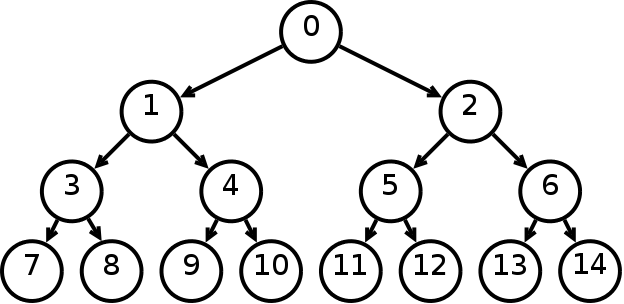

In [6]:
from IPython.display import Image, display
img = Image(filename='tree.png', embed=True)
display(img)

Let each level (starting from level 1) of the tree represent one of the mappings, so the tree should have 2545 levels. Let odd numbers (left branch of each node) represent choosing `False` for each mapping, and even numbers (right) represent `True`. Then one path with length 2545, going from the **0** node to one of the nodes in level 2544, will represent one specific configuration of the **active** column, and there will be 2^2544 paths, representing all the possible configurations. The advantage of using this pure numeric representation is two folds: 

1. we don't need to actually assign a portion of RAM to each node. Instead, we can represent them with just some numbers. Even better, we can represent a series of continuous numbers with intervals, so for example we can represent all nodes in level 3 with [7, 14].

2. Almost all of the pointer-based operations (finding the child or parent of a specific nodes) can be substitute with simple numeric operations.

Sadly it's still impossible deal with 2^2544 paths. To further reduce the computation demands we need two insights:

1. Not all paths are valid. Many of them contains conflicts, which we want to get rid of in the first place. For example, all the even number nodes (and their subtree) from level 2514 that's also in the subtrees of even number nodes of level 1250 should be deleted, since mapping **2514** conflict with **1250** and you cannot make them both **active**

2. We do not need paths that contains too much odd nodes (`False`), since although turning a lot of mappings off is likely to give a valid configuration, it gives poor **score** at the same time. An extreme example is the left-most path which contains 2544 odd numbers, meaning all the mappings are discarded and giving a score of 0. We surely don't want to waster time for these sort of possibilities.

In short, I implented all these ideas including the numeric binary tree, interval representation, conflict exclusion and a threshold of 100 `False` nodes for any path, but it's still taking forever even to finish the later two reductions...